min_x: -10
min_y: -10
max_x: 60
max_y: 60
x_width: 15
y_width: 15
[70.71067811865476, 0.0] [9999.0, 9999.0]
find a path.
[[2, 2, 2, 2, 2, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 11, 11, 11, 11, 11, 12]]


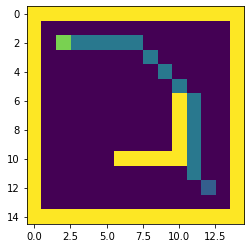

if you want change environment, please input [ok] to start changingok
please input ix number (Type: Int) in [0, 15):12
please input iy number (Type: Int) in [0, 15):7
change [ix: 12, iy: 7] from free to obs
if you want change environment, please input [ok] to start changingok
please input ix number (Type: Int) in [0, 15):9
please input iy number (Type: Int) in [0, 15):11
change [ix: 9, iy: 11] from free to obs
if you want change environment, please input [ok] to start changingstop
changed map: 10.0
changed map: 10.0
[75.22179687553873, 17.071067811865476] [85.35533905932738, 80.35533905932738]
find a path.
[[2, 2, 2, 2, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [3, 4, 5, 6, 7, 8, 9, 10, 11, 11, 11, 12, 12, 12, 12]]


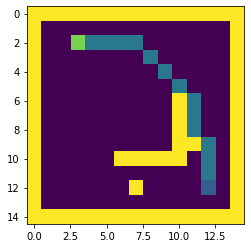

one iter planning timecost: 80626.87937045097
if you want change environment, please input [ok] to start changingok
please input ix number (Type: Int) in [0, 15):9
please input iy number (Type: Int) in [0, 15):12
change [ix: 9, iy: 12] from free to obs
if you want change environment, please input [ok] to start changingok
please input ix number (Type: Int) in [0, 15):9
please input iy number (Type: Int) in [0, 15):13
change [ix: 9, iy: 13] from free to obs
if you want change environment, please input [ok] to start changingstop
changed map: 10.0
changed map: 10.0
[78.15072906367325, 15.0] [85.35533905932738, 75.35533905932738]
find a path.
[[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 11, 11, 11, 11, 11, 12], [4, 4, 4, 4, 4, 4, 4, 4, 5, 6, 7, 8, 9, 10, 11, 12]]


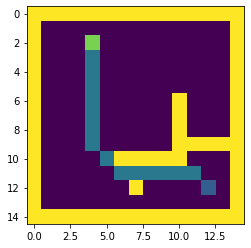

one iter planning timecost: 169.82818508148193
if you want change environment, please input [ok] to start changingstop


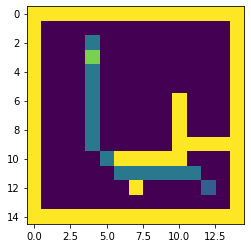

one iter planning timecost: 76.39584279060364
if you want change environment, please input [ok] to start changinga


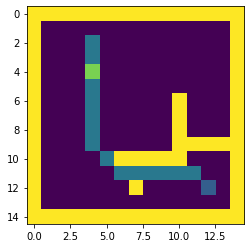

one iter planning timecost: 26.911738872528076
if you want change environment, please input [ok] to start changinga


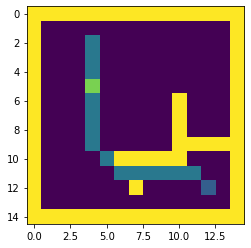

one iter planning timecost: 8.348270416259766
if you want change environment, please input [ok] to start changinga


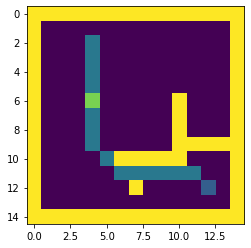

one iter planning timecost: 6.944493055343628
if you want change environment, please input [ok] to start changinga


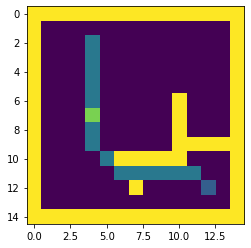

one iter planning timecost: 6.2997424602508545
if you want change environment, please input [ok] to start changinga


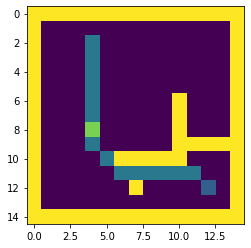

one iter planning timecost: 10.459777116775513
if you want change environment, please input [ok] to start changinga


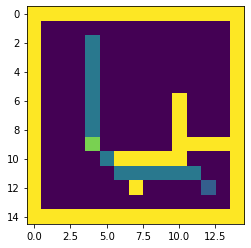

one iter planning timecost: 1.7018132209777832
if you want change environment, please input [ok] to start changinga


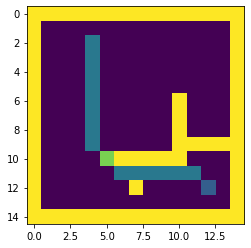

one iter planning timecost: 1.6908869743347168
if you want change environment, please input [ok] to start changinga


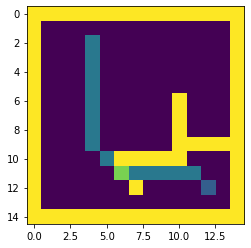

one iter planning timecost: 0.9122979640960693
if you want change environment, please input [ok] to start changinga


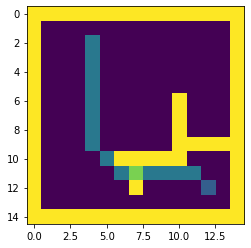

one iter planning timecost: 0.8423113822937012
if you want change environment, please input [ok] to start changinga


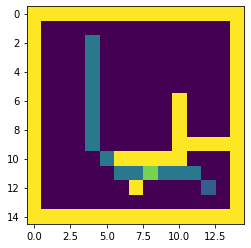

one iter planning timecost: 1.019646406173706
if you want change environment, please input [ok] to start changinga


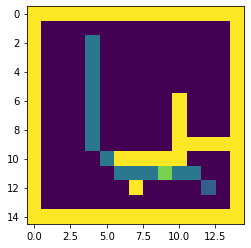

one iter planning timecost: 0.9928455352783203
if you want change environment, please input [ok] to start changinga


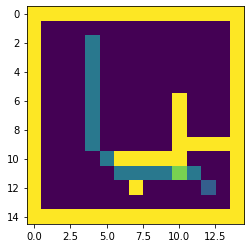

one iter planning timecost: 1.1211228370666504
if you want change environment, please input [ok] to start changinga


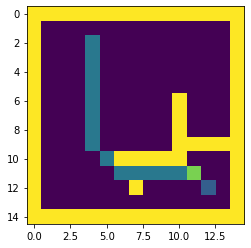

one iter planning timecost: 0.8046932220458984
if you want change environment, please input [ok] to start changinga


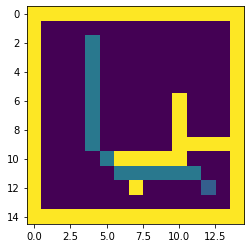

one iter planning timecost: 1.3120839595794678


In [1]:
import heapq
import math
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib
%matplotlib inline
#set up matplotlib
MAX_INT = 9999.0
class GridMap:
    def __init__(self, ox, oy, resolution):
        self.min_x = None
        self.min_y = None
        self.max_x = None
        self.max_y = None
        self.x_width = None
        self.y_width = None
        self.obstacle_map = None
        
        self.resolution = resolution
        self.calc_obstacle_map(ox, oy)
        
    def calc_obstacle_map(self, ox, oy):

        self.min_x = round(min(ox))
        self.min_y = round(min(oy))
        self.max_x = round(max(ox))
        self.max_y = round(max(oy))
        print("min_x:", self.min_x)
        print("min_y:", self.min_y)
        print("max_x:", self.max_x)
        print("max_y:", self.max_y)

        self.x_width = round((self.max_x - self.min_x) / self.resolution)+1
        self.y_width = round((self.max_y - self.min_y) / self.resolution)+1
        print("x_width:", self.x_width)
        print("y_width:", self.y_width)

        # obstacle map generation
        self.obstacle_map = np.zeros((self.x_width, self.y_width))
        for x, y in zip(ox, oy):
            ix, iy = self.calc_xy_index(x, self.min_x), self.calc_xy_index(y, self.min_y)
            if 0<=ix<self.x_width and 0<=iy<self.y_width:
                self.obstacle_map[ix, iy] = 10.0  
        

    def calc_position(self, index, minp):
        pos = index * self.resolution + minp
        return pos

    def calc_xy_index(self, position, minp):
        return round((position - minp) / self.resolution)
    
    def calc_unique_index(self, ix, iy):
        return iy*self.x_width + ix

    def verify_node(self, ix, iy):
        if ix >= self.x_width or ix < 0 or iy >= self.y_width or iy < 0:
            return False      
        return True

sx = -5.0  # [m]
sy = -5.0  # [m]
gx = 50.0  # [m]
gy = 50.0  # [m]
grid_size = 5.0  # [m]
robot_radius = 1.0  # [m]

# set obstacle positions
ox, oy = [], []
for i in range(-10, 60):
    ox.append(i)
    oy.append(-10.0)
for i in range(-10, 60):
    ox.append(60.0)
    oy.append(i)
for i in range(-10, 61):
    ox.append(i)
    oy.append(60.0)
for i in range(-10, 61):
    ox.append(-10.0)
    oy.append(i)
# for i in range(-10, 40):
#     ox.append(20.0)
#     oy.append(i)
for i in range(20, 40):
    ox.append(40.0)
    oy.append(60.0 - i)    
    
for i in range(20, 40):
    oy.append(40.0)
    ox.append(i)      
grid_map = GridMap(ox, oy, grid_size)


class Node:
    def __init__(self, ix, iy, g=9999.0, rhs=9999.0, P=None):
        self.ix = ix
        self.iy = iy
        self.g = g
        self.rhs = rhs
        self.P = P
        
action_set = {'UP':[0, 1], 'DOWN':[0, -1], 'LEFT':[-1, 0], 'RIGHT':[1, 0], 'UL':[-1, 1], 'UR':[1, 1], 'DL':[-1, -1], 'DR':[1, -1]}

class DstarLite(object):
    def __init__(self, grid_map, start_node, end_node):
        self.grid_map = grid_map
        self.start_uid = self.grid_map.calc_unique_index(start_node.ix, start_node.iy)
        self.end_uid = self.grid_map.calc_unique_index(end_node.ix, end_node.iy)
        
        self.SPath = [] # 最优轨迹
        self.km = 0.0
        
        self.ANB = {} # all node buffer
        self.init_ANB()
        self.U = {}
        self.Qu = []
        self.ANB[self.end_uid] = end_node
        self.U[self.end_uid] = end_node
        heapq.heappush(self.Qu, (self.calculatekey(end_node), self.end_uid)) 
        self.main()
        
    def init_ANB(self):
        for ix in range(self.grid_map.x_width):
            for iy in range(self.grid_map.y_width):
                self.ANB[self.grid_map.calc_unique_index(ix, iy)] = Node(ix, iy)
        
    def get_neighbors(self, current):
        for a in action_set:
            ix, iy = current.ix+action_set[a][0], current.iy+action_set[a][1]
            if self.grid_map.verify_node(ix, iy):
                cx1x2 = np.sqrt(action_set[a][0]*action_set[a][0]+action_set[a][1]*action_set[a][1])*self.grid_map.resolution
                if (abs(self.grid_map.obstacle_map[ix, iy]-10.0) < 0.01 or 
                   abs(self.grid_map.obstacle_map[current.ix, current.iy]-10.0) < 0.01):
                    cx1x2 = MAX_INT                    
                yield (self.grid_map.calc_unique_index(ix, iy), cx1x2)        
        
    def get_heuristic(self, node):
        dx = node.ix - self.ANB[self.start_uid].ix
        dy = node.iy - self.ANB[self.start_uid].iy
        return np.sqrt(dx*dx+dy*dy)*self.grid_map.resolution       
        
    def calculatekey(self, node):
        return [min(node.g, node.rhs)+self.get_heuristic(node)+self.km, min(node.g, node.rhs)]
    
    def calculate_rhs(self, node):
        node.rhs = MAX_INT
        for pre_uid, cx1x2 in self.get_neighbors(node):
            pre_node = self.ANB[pre_uid]
            if pre_node.g+cx1x2 < node.rhs:
                node.rhs = pre_node.g+cx1x2
                node.P = pre_uid
        return node
    
    def updatenode(self, node_uid):            
        if node_uid != self.end_uid: # line 06
            self.ANB[node_uid] = self.calculate_rhs(self.ANB[node_uid])
        
        if node_uid in self.U:  # line 07
            del self.U[node_uid]
        if abs(self.ANB[node_uid].g - self.ANB[node_uid].rhs) > 0.00001: # line 08
            self.U[node_uid] = self.ANB[node_uid]
            heapq.heappush(self.Qu, (self.calculatekey(self.ANB[node_uid]), node_uid))       

    def waitenvchange(self):
        change_ixiy = []
        while input("if you want change environment, please input [ok] to start changing") == "ok":
            ix = int(input("please input ix number (Type: Int) in [0, "+str(self.grid_map.x_width)+"):"))
            iy = int(input("please input iy number (Type: Int) in [0, "+str(self.grid_map.y_width)+"):")) 
            if ix >= 0 and ix < self.grid_map.x_width and iy >= 0 and iy <self.grid_map.y_width:
                if abs(self.grid_map.obstacle_map[ix, iy] - 10.0) < 0.01:
                    self.grid_map.obstacle_map[ix, iy] = 0.0
                    print("change [ix: %d, iy: %d] from obs to free"%(ix, iy))
                else:
                    self.grid_map.obstacle_map[ix, iy] = 10.0
                    print("change [ix: %d, iy: %d] from free to obs"%(ix, iy))    
            change_ixiy.append([ix, iy])
        return change_ixiy
    
    def shortestpathfinder(self):
        SPath_x = [self.ANB[self.start_uid].ix]
        SPath_y = [self.ANB[self.start_uid].iy]      
        v_uid = self.ANB[self.start_uid].P
        while v_uid: 
            SPath_x.append(self.ANB[v_uid].ix)
            SPath_y.append(self.ANB[v_uid].iy)
            v_uid = self.ANB[v_uid].P
        self.SPath = [list(SPath_x), list(SPath_y)] 
        
    def get_new_start(self, pre_start_uid):
        new_start_uid = self.ANB[pre_start_uid].P
        return new_start_uid
    
    def computeshortestpath(self):
        while self.Qu[0][1] not in self.U: # 保证堆项元系的确在U列表中            
            k, c_id = heapq.heappop(self.Qu)         
        is_into_while = False
        print([self.Qu[0][0][0], self.Qu[0][0][1]] , self.calculatekey(self.ANB[self.start_uid]))
        while (self.Qu and 
               (self.Qu[0][0] < self.calculatekey(self.ANB[self.start_uid]) or 
                self.ANB[self.start_uid].g != self.ANB[self.start_uid].rhs)):
            k_old, c_id = heapq.heappop(self.Qu)
            current = self.U.pop(c_id)
            if k_old < self.calculatekey(current):
                self.U[c_id] = self.ANB[c_id]
                heapq.heappush(self.Qu, (self.calculatekey(current), c_id)) 
            elif current.g > current.rhs:
                self.ANB[c_id].g = current.rhs
            else:
                self.ANB[c_id].g = MAX_INT
                self.updatenode(c_id)
            for succ_uid, cx1x2 in self.get_neighbors(self.ANB[c_id]):
                self.updatenode(succ_uid)             
                            
            is_into_while = True
            while self.Qu[0][1] not in self.U: # 保证堆项元系的确在U列表中            
                k, c_id = heapq.heappop(self.Qu)                     
            
        if is_into_while: 
            print("find a path.")
            self.shortestpathfinder()
            print(self.SPath)
                
    def plot_result(self):      
        if len(self.SPath) > 0:
            for ix, iy in zip(self.SPath[0], self.SPath[1]):
                self.grid_map.obstacle_map[ix, iy] = 4  
        plt.clf()  
        self.grid_map.obstacle_map[self.ANB[self.start_uid].ix, self.ANB[self.start_uid].iy] = 8
        self.grid_map.obstacle_map[self.ANB[self.end_uid].ix, self.ANB[self.end_uid].iy] = 3        
        plt.imshow(self.grid_map.obstacle_map)
        plt.show()
#         if is_ipython:
#             display.clear_output(wait=True)
#             display.display(plt.gcf())   
        if len(self.SPath) > 0:            
            for ix, iy in zip(self.SPath[0], self.SPath[1]):
                self.grid_map.obstacle_map[ix, iy] = 0   
            
    def is_node_on_optpath(self, node):
        for ix, iy in zip(self.SPath[0], self.SPath[1]):
            if ix == node.ix and iy == node.iy:
                return True
        return False
        
        
    def main(self):
        last_uid = self.start_uid
        self.computeshortestpath()
        self.plot_result()
        while self.start_uid != self.end_uid:
            import time
            t0 = time.time()              
            if self.ANB[self.start_uid].g > 1000.0:
                print("there is no known path.")
                return;
            self.start_uid = self.get_new_start(self.start_uid)
            change_ixiy = self.waitenvchange()
            if len(change_ixiy) > 0:
                self.km += self.get_heuristic(self.ANB[last_uid])
                last_uid = self.start_uid                
                for ix, iy in change_ixiy:
                    print("changed map:", self.grid_map.obstacle_map[ix, iy])
                    change_index = self.grid_map.calc_unique_index(ix, iy)
#                     if ((abs(self.grid_map.obstacle_map[ix, iy] - 10.0) < 0.01 and 
#                          self.is_node_on_optpath(self.ANB[change_index])) or 
#                         (abs(self.grid_map.obstacle_map[ix, iy] - 10.0) > 0.01 and
#                         self.calculate_rhs(self.ANB[change_index]).rhs+self.get_heuristic(self.ANB[change_index]) < self.ANB[self.end_uid].g)):
#                         self.updatenode(change_index)
                    self.updatenode(change_index)   # 如果使用定理一与定理二，则注释该行，并取消上面五行的注释 
  
                self.computeshortestpath()
            self.plot_result()
            print("one iter planning timecost:", time.time()-t0)
       
         
start_node = Node(2, 2)
end_node = Node(12, 12, rhs=0.0)
grid_map.obstacle_map[start_node.ix, start_node.iy] = 8
grid_map.obstacle_map[end_node.ix, end_node.iy] = 3
plt.imshow(grid_map.obstacle_map)
planner = DstarLite(grid_map, start_node, end_node)